Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Margot Wolsink 2009813"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam September 7th, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam September 7, 2018".



## Demand and equilibrium

We start by importing the usual libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

#### a) [1 point] Explain in words what the following code does. Which property of booleans in python do we use for this to work?

[hint: copy-paste part of the code in a cell to evaluate each step separately]

In [3]:
np.sum(np.array([1,2,3,4,5,6,7,8])>3)/len(np.array([1,2,3,4,5,6,7,8])>3)

0.625

In [4]:
np.sum(np.array([1,2,3,4,5,6,7,8])>3)

5

In [5]:
np.array([1,2,3,4,5,6,7,8])>3

array([False, False, False,  True,  True,  True,  True,  True])

In [6]:
len(np.array([1,2,3,4,5,6,7,8])>3)

8

The following code divides the sum of the numbers that are bigger than 3 in the array by the length of the array that is bigger than three. For the last part it just counts for the whole array since because of the booleans it returns true or false the length remains 8. That's why it returns 8. 

#By checking step by step what this function does you can figure out what it means. Booleans return either true or false which was an aspect I got to use

Consider a market with 1000 consumers. Each consumer is willing to buy either 1 or 0 units of the product in this market. If the consumer does not buy, her utility equals 0.

The vector of valuations of all 1000 consumers in the market is given by the vector `vector_utilities` below.


In [7]:
N_consumers = 1000
vector_utilities = np.random.normal(10,3,size=N_consumers)

In [8]:
np.array(vector_utilities)>0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

#### b) [0.5 points] Explain what the code `np.random.normal` does.

The code np.random.normal gives us a random normalized distribution. 

#### c) [1. point] (i) Create a histogram of the vector `vector_utilities`. (ii) Make sure that we have relative frequencies (not absolute numbers) on the vertical axis [hint: you can use google to figure out how this works] (iii) Put the label 'utility' on the horizontal axis and the label 'frequency' on the vertical axis.

Text(0.5,0,'utility')

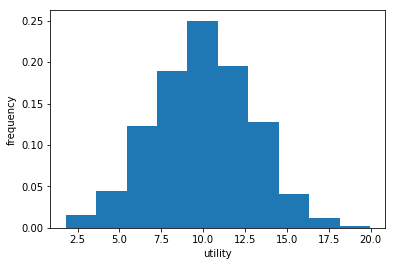

In [9]:
plt.hist(vector_utilities, weights=np.zeros_like(vector_utilities) + 1. / vector_utilities.size)
plt.ylabel("frequency")
plt.xlabel("utility")

#using matplotlibs function for plotting histograms I plotted the vector_utilities and by googling I found out how to put it into relative frequencies. Then I used the ylabel function and the x-label function. 

#### d) [0.5 points] Complete the following function which gives for each price `p` the demand (number of consumers willing to buy at price `p`.

[hint 1: what must be true for an element in `vector_utilities` for this consumer to buy the product?]

[hint 2: part of what you learned under a) may be useful here]

In [10]:
def demand(p):
    return 1000- p*(sum(np.array(vector_utilities)>0))        

In [11]:
sum((np.array(vector_utilities)>0))

1000

The element in vector_utilities that must be true for this consumer to buy a product is that utility must be more than 0. To check this we can use the part under a where the array of booleans returns true or false. Then we need to count how many of these return true. It shows that all 1000 of them are more than 0 meaning that they all buy the product. If we then need to define demand we look for 1000- price*the amount of people that were going to buy since their utility is more than 0.

#### e) [0.5 points] Plot this demand function. Recall that economists tend to put quantity on the horizontal axis and price on the vertical axis.

[hint: if for some reason you could not solve d) work with the following --incorrect-- demand function:

`def demand(p):
   return 1000-p`

to finish the exam.]

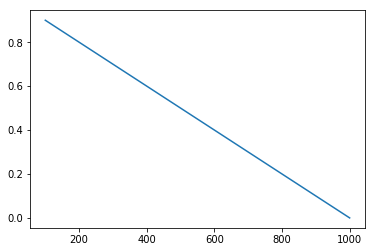

In [12]:
range_p=np.arange(0,1,0.1)
plt.plot(demand(range_p),range_p)


By setting an np.arange for p between 0 and 1 we can see what portion of the people is going to buy. Since p was not defined earlier I decided to do it like this.

Assume that there is a fixed supply of 400 units of this product. Consider the following function `excess demand`.

In [13]:
supply = 400
def excess_demand(p):
    return demand(p)-supply

#### f) [0.5 points] Use a numerical solver to solve for the equilibrium price. Use the figure under e) to give a reasonable starting point for the numerical solver.

[hint: what must be true for `excess_demand` at the equilibrium price?]

In [14]:
initial_guess= [0]
optimize.fsolve(lambda p: excess_demand(p),initial_guess)

array([0.6])

An equilibrium price means that demand is equal to supply so excess demand must be 0. The numerical solver I used was based off what we did in class. 

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.